Building model up simultaneously to geomodeller.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')

import gempy as gp
import os
import pandas as pn


import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

In [2]:
path_interf = "\\Points_2faults.csv"
path_orient = "\\Foliations_2faults.csv"

In [3]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [4]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

In [5]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                               'Liassic','Triassic','Carboniferous','basement'])

In [6]:
modelcolors = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#7e7e7e','fault_NS':'#7e7e7e'}

In [7]:
geo_data.set_colors(modelcolors)

,value,formation_number,color
fault_NWSE,1,1,#7e7e7e
fault_NS,2,2,#7e7e7e
Liassic,3,3,#015482
Triassic,4,4,#9f0052
Carboniferous,5,5,#ffbe00
basement,6,6,#728f02


### Topography

In [11]:
path_dtm='\\MNT_Dx25m_ALES_L93.asc' #path to where the raster file is stored
folder= "\\unwichtig" #define a folder where the cropped dem should be stored
xyz_path = "\\XYZ.csv" #define a path for the csv file that is generated

In [12]:
# import topography
from gempy.utils import topography

In [13]:
# initialize topography object
elevation = topography.DEM(path_dem = path_dtm, geodata = geo_data, output_path = folder,interpdata=interp_data)

Extents of geo_data and DEM do not match. DEM is cropped and stored as C:\Users\elisa\Documents\git\MSc\GempyTopography\unwichtig_cropped_DEM.tif


Raster extent: [ 777000  794500 6345000 6353000     138     730] 
Raster resolution: [320 700]


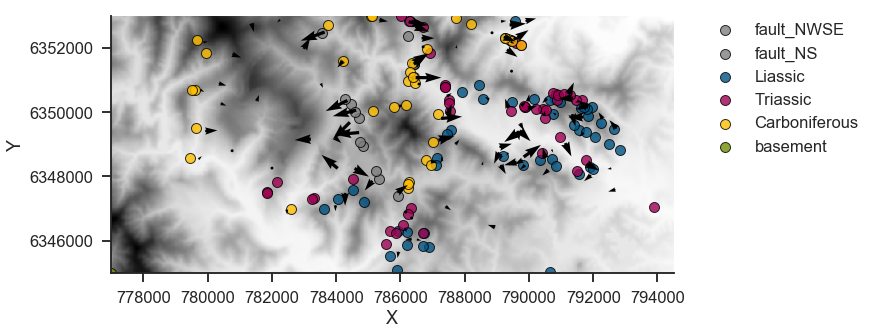

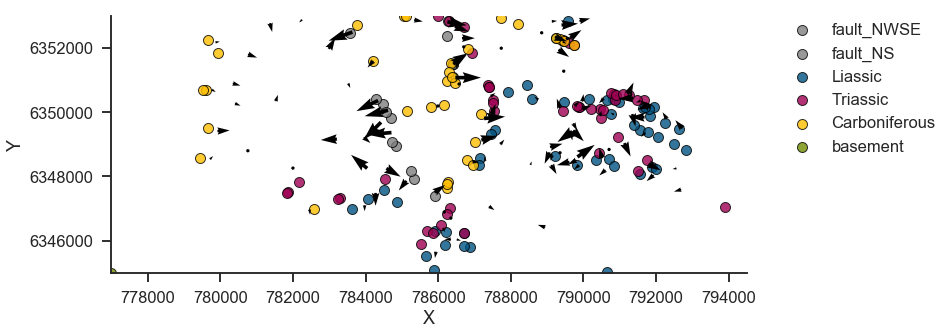

In [14]:
elevation.show(plot_data=True)
gp.plotting.plot_data(geo_data,direction='z')

In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2


In [ ]:
# calculate geological map (np array)
geomap = elevation.calculate_geomap(interpdata=interp_data)

#### calculate and plot geological map (can take a while):

In [ ]:
gp.plotting.plot_map(geo_data,topography=elevation)

#### plot topography in sections:

In [11]:
lith_block, fault_block = gp.compute_model(interp_data)

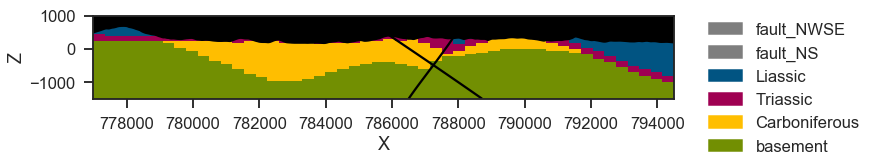

In [19]:
gp.plot_section(geo_data, lith_block[0], cell_number=5,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')